<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Sarina Heshmati


# Import Libraries

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")

In [55]:
df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


# Load and Explore Dataset

Explore the dataset and get familiar with its features and statistics. (don't worry about the 'masked values' in our target column. They are simply used to automatically test your model later on.)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       722 non-null    int64 
 1   Attrition                 722 non-null    object
 2   BusinessTravel            722 non-null    object
 3   DailyRate                 722 non-null    int64 
 4   Department                722 non-null    object
 5   DistanceFromHome          722 non-null    int64 
 6   Education                 722 non-null    int64 
 7   EducationField            722 non-null    object
 8   EmployeeCount             722 non-null    int64 
 9   EmployeeNumber            722 non-null    int64 
 10  EnvironmentSatisfaction   722 non-null    int64 
 11  Gender                    722 non-null    object
 12  HourlyRate                722 non-null    int64 
 13  JobInvolvement            722 non-null    int64 
 14  JobLevel    

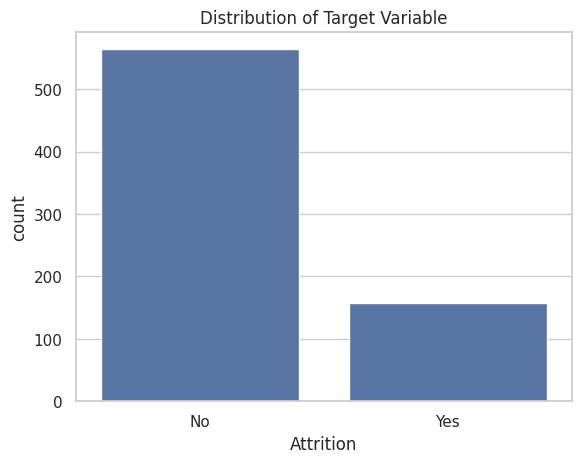

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


In [56]:
# Load the Breast Cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Check the basic structure of the dataset
print("Dataset Info:")
df.info()  # Check data types and for missing values

print("\nSummary Statistics:")
print(df.describe())  # Summary statistics of numeric features

# Check for any missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())  # Find if any column has missing values

# Explore the target variable (binary classification)
print("\nTarget Variable Distribution:")
print(df['Attrition'].value_counts())  # Distribution of the target classes

# Visualize the target distribution
sns.countplot(x='Attrition', data=df)
plt.title("Distribution of Target Variable")
plt.show()

# Check the first few rows of the dataset
df.head()

It is generally better to remove columns with only one unique value from a DataFrame when preparing data for a decision tree. <br>
Such columns do not provide any useful information for splitting the data and can lead to unnecessary complexity in the model. Remove the said columns from the DataFrame.

In [57]:
# Measure and print the number of unique values for each column.
# Check if there are any columns with less than 2 unique values. If so, remove them.

unique_counts= {}
for col in df:
    unique_counts[col]= df[col].nunique()
print(unique_counts)

print("colmuns with less than 2 unique values: ")
for key, value in unique_counts.items():
    if value<2:
        print(key)
        df.drop(key, axis= 1, inplace= True)

{'Age': 42, 'Attrition': 2, 'BusinessTravel': 3, 'DailyRate': 556, 'Department': 3, 'DistanceFromHome': 29, 'Education': 5, 'EducationField': 6, 'EmployeeCount': 1, 'EmployeeNumber': 722, 'EnvironmentSatisfaction': 4, 'Gender': 2, 'HourlyRate': 71, 'JobInvolvement': 4, 'JobLevel': 5, 'JobRole': 9, 'JobSatisfaction': 4, 'MaritalStatus': 3, 'MonthlyIncome': 689, 'MonthlyRate': 713, 'NumCompaniesWorked': 10, 'Over18': 1, 'OverTime': 2, 'PercentSalaryHike': 15, 'PerformanceRating': 2, 'RelationshipSatisfaction': 4, 'StandardHours': 1, 'StockOptionLevel': 4, 'TotalWorkingYears': 40, 'TrainingTimesLastYear': 7, 'WorkLifeBalance': 4, 'YearsAtCompany': 33, 'YearsInCurrentRole': 19, 'YearsSinceLastPromotion': 16, 'YearsWithCurrManager': 17}
colmuns with less than 2 unique values: 
EmployeeCount
Over18
StandardHours


Look at the DataFrame and try to gather insight into people's monthly income and things that generally affect this number.

Highest Average Income:  Sales
Lowest Average Income:  Human Resources


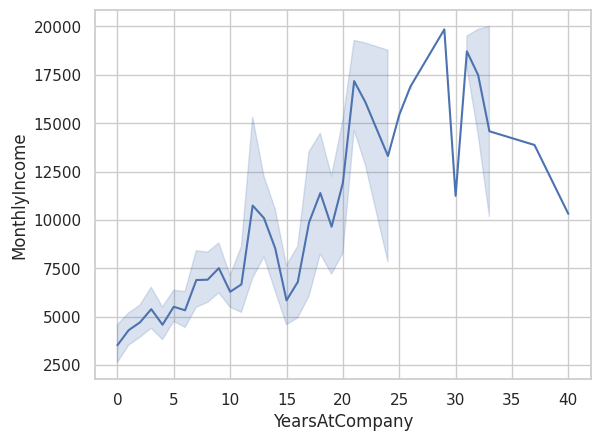

In [58]:
# TODO: Plot the average MonthlyIncome against the YearsAtCompany.
# Then find which departments have the highest and lowest incomes on average.

sns.lineplot(data= df, x= 'YearsAtCompany', y= 'MonthlyIncome')
print('Highest Average Income: ', df.groupby('Department')['MonthlyIncome'].mean().idxmax())
print('Lowest Average Income: ',df.groupby('Department')['MonthlyIncome'].mean().idxmin())

# Data Preprocessing

Label Encode categorical columns and create a new DataFrame. Then split this data into train and test.

In [59]:
# Label encode all categorical columns

encoded_df= df.copy()
for col in encoded_df.columns:
    if encoded_df[col].dtype=='object':
        encoded_df[col]=LabelEncoder().fit_transform(encoded_df[col])
encoded_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,0,2,592,1,7,3,1,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,34,0,2,1326,2,3,3,4,1478,4,...,3,4,0,15,2,3,13,9,3,12
2,27,0,2,954,2,9,3,2,1965,4,...,3,1,0,7,5,3,7,7,0,7
3,32,0,2,929,2,10,3,2,722,4,...,3,4,0,10,2,2,10,7,0,8
4,50,0,1,1234,1,20,5,3,1606,2,...,3,3,1,32,3,3,30,8,12,13


In [60]:
# Split into features and target variable
X = encoded_df.drop(columns=['Attrition'])
y = encoded_df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN) Model

Implement KNN model from scratch.

In [61]:
import numpy as np
from collections import Counter

class CustomKNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # Store the number of neighbors (k)
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        # Store training data
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Euclidean distance between x1 and x2.
        """
        # Calculate and return the Euclidean distance
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # Predict label for each test instance and return the array of predictions
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # Compute distances from x to all training points
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        # Find the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common label among the k nearest neighbors (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [62]:
# Optional. You can choose any range of k values that you want.
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []
models= []

# Fit the model using the scaled training data
# Make predictions on the scaled test data
# Evaluate the model's accuracy for each value of k and choose the best one
for k in k_values:
  my_model= CustomKNN(k)
  my_model.fit(X_train_scaled, y_train)
  y_pred_custom= my_model.predict(X_test_scaled)
  accuracy= accuracy_score(y_test, y_pred_custom)
  print(f'k: {k} - Accuracy: {accuracy}')
  models.append(my_model)
  accuracies.append(accuracy)

best_custom_model= models[np.argmax(accuracies)]
# Keep the best k value (needed later on with bagging)
bestk= k_values[np.argmax(accuracies)]

k: 1 - Accuracy: 0.695852534562212
k: 3 - Accuracy: 0.7327188940092166
k: 5 - Accuracy: 0.7649769585253456
k: 7 - Accuracy: 0.7926267281105991
k: 9 - Accuracy: 0.7972350230414746
k: 11 - Accuracy: 0.7972350230414746
k: 13 - Accuracy: 0.7880184331797235
k: 15 - Accuracy: 0.7880184331797235


In [63]:
# Print the accuracy and classification report using sklearn's metrics for your best model
y_pred= best_custom_model.predict(X_test_scaled)
print("Model's Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model's Accuracy: 0.7972350230414746
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       170
           1       0.67      0.13      0.21        47

    accuracy                           0.80       217
   macro avg       0.73      0.56      0.55       217
weighted avg       0.77      0.80      0.74       217



Visualize the confusion matrix for KNN predictions.

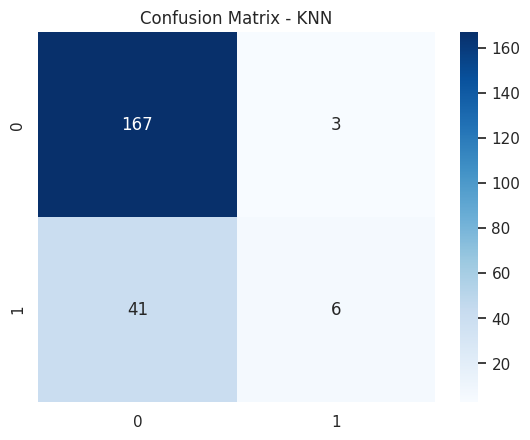

In [64]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()

## Evaluation
In this part, we are going to evaluate your model's performance on another set of unseen data. Load test.csv (this data is already encoded), use your best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.

In [70]:
# Load test.csv
eval_df= pd.read_csv('encodedtest.csv')
# Use your old scaler to scale the data
eval_df= scaler.transform(eval_df)
# Predict using your model
y_pred_eval= best_custom_model.predict(eval_df)

Save the results in a DataFrame

In [72]:
# Save the results as a csv file
result_df= pd.DataFrame()
result_df['target']=pd.Series(y_pred_eval)
result_df.to_csv('result.csv', index= False)

# Random Forest Model

In [75]:
# Random Forest Model Implementation
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)
rf_cv.fit(X_train, y_train)

# Best Random Forest model
best_rf = rf_cv.best_estimator_

# Prediction and evaluation
y_pred_rf = best_rf.predict(X_test)

# Print Random Forest model accuracy and classification report
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.815668202764977
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       170
           1       0.73      0.23      0.35        47

    accuracy                           0.82       217
   macro avg       0.78      0.61      0.62       217
weighted avg       0.80      0.82      0.78       217



Visualize the confusion matrix for Random Forest predictions.

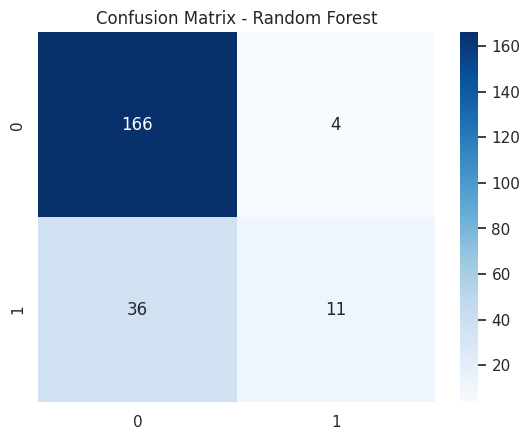

In [76]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

A feature importance plot is a visual representation that illustrates the significance of each feature (or variable) in a machine learning model, particularly in the context of supervised learning tasks like classification and regression. Plot the feature importances using a bar plot.

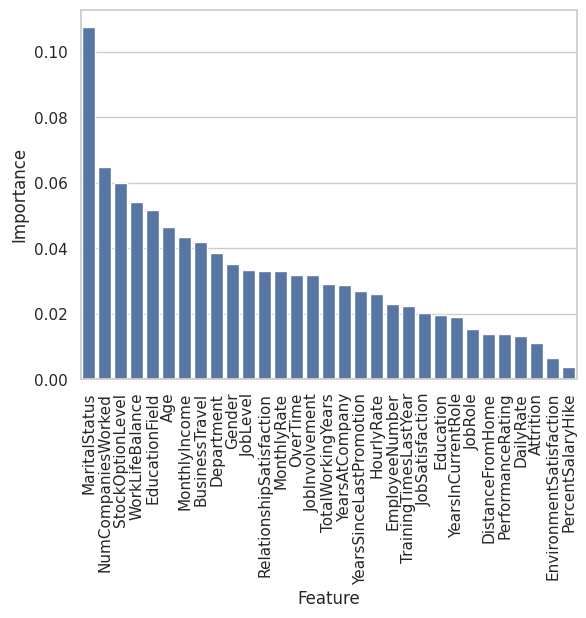

In [77]:
imps= best_rf.feature_importances_
indices= np.argsort(imps)[::-1]
importance_df= pd.DataFrame({'Feature': df.columns[indices], 'Importance': imps[indices]})

sns.barplot(data= importance_df, x='Feature', y='Importance').tick_params(axis='x', rotation=90)

# Bagging with KNN

In [78]:
# Bagging with KNN Model Implementation
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestk), n_estimators=50, random_state=42)
bagging_knn.fit(X_train_scaled, y_train)

# Prediction and evaluation
y_pred_bagging_knn = bagging_knn.predict(X_test_scaled)

# Print Bagging with KNN model accuracy and classification report
print("Bagging with KNN Model Accuracy:", accuracy_score(y_test, y_pred_bagging_knn))
print(classification_report(y_test, y_pred_bagging_knn))

Bagging with KNN Model Accuracy: 0.7788018433179723
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       170
           1       0.43      0.06      0.11        47

    accuracy                           0.78       217
   macro avg       0.61      0.52      0.49       217
weighted avg       0.71      0.78      0.71       217



Visualize the confusion matrix for Bagging with KNN

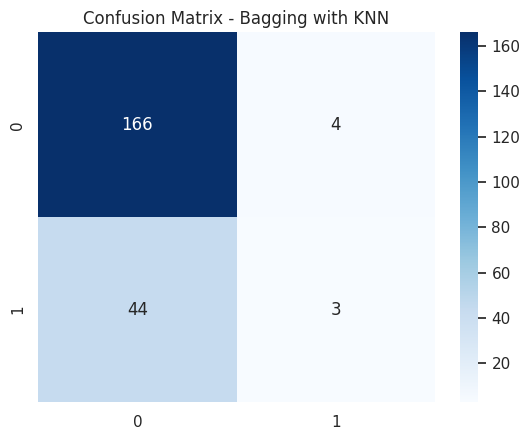

In [79]:
# Confusion Matrix for Bagging with KNN
cm_bagging_knn = confusion_matrix(y_test, y_pred_bagging_knn)
sns.heatmap(cm_bagging_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Bagging with KNN')
plt.show()

# AdaBoost Model

In [80]:
# AdaBoost Model Implementation
adaboost = AdaBoostClassifier(random_state=42)

# Hyperparameter tuning for AdaBoost
param_grid_ada = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
adaboost_cv = GridSearchCV(adaboost, param_grid_ada, cv=5)
adaboost_cv.fit(X_train, y_train)

# Best AdaBoost model
best_adaboost = adaboost_cv.best_estimator_

# Prediction and evaluation
y_pred_adaboost = best_adaboost.predict(X_test)

# Print AdaBoost model accuracy and classification report
print("AdaBoost Model Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print(classification_report(y_test, y_pred_adaboost))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost Model Accuracy: 0.8387096774193549
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       170
           1       0.77      0.36      0.49        47

    accuracy                           0.84       217
   macro avg       0.81      0.67      0.70       217
weighted avg       0.83      0.84      0.82       217



Visualize the confusion matrix for AdaBoost predictions

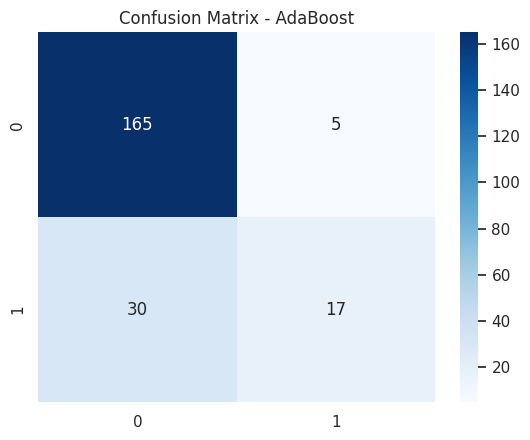

In [81]:
# Confusion Matrix for AdaBoost
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

# Model Comparison


Model Comparison Table:
           Model  Accuracy
0            KNN  0.797235
1  Random Forest  0.815668
2    Bagging KNN  0.778802
3       AdaBoost  0.838710


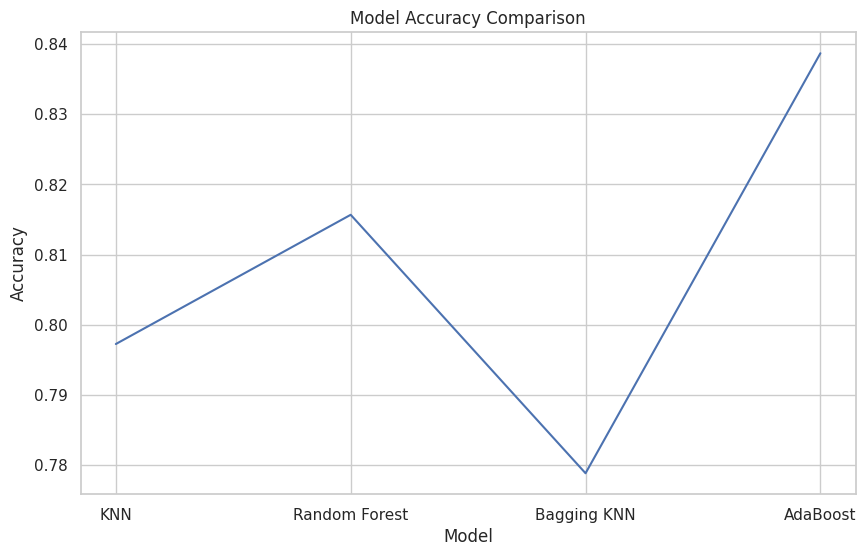

In [82]:
# Create a table comparing all the models' accuracy
models = ['KNN', 'Random Forest', 'Bagging KNN', 'AdaBoost']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_bagging_knn),
    accuracy_score(y_test, y_pred_adaboost)
]

accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Display the comparison table
print("\nModel Comparison Table:")
print(accuracy_df)

# Plotting model accuracies for comparison
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Model Accuracy Comparison')
plt.show()